# Object Detection 

In [29]:
import cv2
import matplotlib.pyplot as plt

In [30]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [31]:
frozen_model = 'frozen_inference_graph.pb'

In [32]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [33]:
classLabels = [] ## emptylist of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [34]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [53]:
print(len(classLabels))

80


In [94]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)  # 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5))  ## mobilenet takes input as [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0000024A3CC62DB0>

In [95]:
img = cv2.imread('image2.jpg')

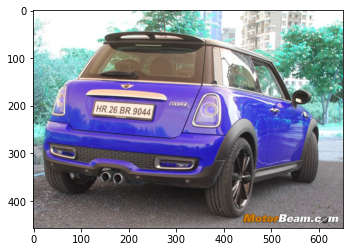

In [96]:
plt.imshow(img)

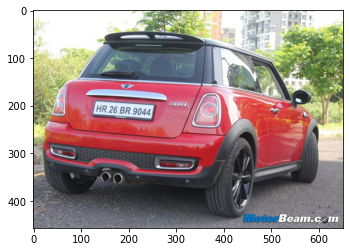

In [97]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [98]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [100]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 20, boxes[1] + 40), font, fontScale=font_scale,
                color=(0, 255, 0), thickness=3)

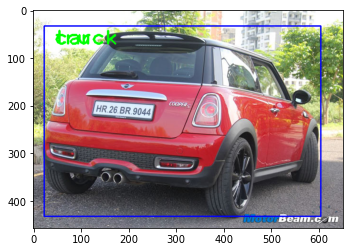

In [101]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [122]:
img = cv2.imread('image_3.jpg')

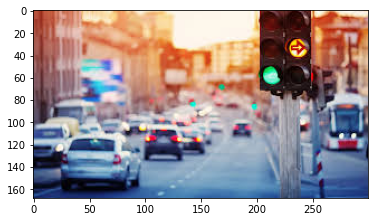

In [123]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [124]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [125]:
print(ClassIndex)

[ 3  3 10  3  3  3  3 10  8  6  3 10  3]


In [126]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 20, boxes[1] + 40), font, fontScale=font_scale,
                color=(0, 255, 0), thickness=3)

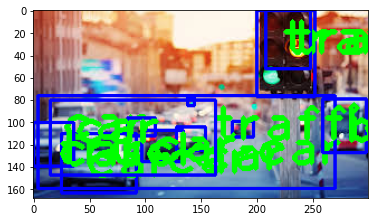

In [127]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))